**Regresión lineal múltiple.**

Uso de valicación cruzada K-Folk, así como diversas librerías de Python.

Hello, I'm Go1234550

Realizaremos una regresión lineal múltiple para predecir el precio de compra de un vehículo haciendo uso de las siguientes variables:

* annual Salary: Indica el salario anual que percibe una persona.

* age: Corresponde a la edad de la persona.

Se consideran estas variables ya que son las que tienen mayor correlación con nuestra variable a predecir.

**Importamos las librerías.**

Importamos las librerías necesarias y, además, leemos nuestro *dataset*.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

full_data_file = pd.read_csv('car_purchasing.csv', header=0, encoding='latin-1')
full_data_file

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


**Realizamos el Train-Test Split**

Extraemos los datos que utilizaremos, considerando un 60% para el conjunto de entrenamiento y 40% para el de pruebas.

In [3]:
# Extracting the data from the file
x = full_data_file[['age', 'annual Salary']].values
y = full_data_file[['car purchase amount']].values

# Train test split 60% train, 40% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

**Implementación de la validación cruzada K-Fold**

Realizamos nuestra validación cruzada K-Fold con 5 lotes.

In [4]:
# Number of folds for cross validation
n_folds = 5

# Create the cross-validation object
kfold = KFold(n_folds)

# Vector to store the cross-validation scores(MSE)
cross_val_mse = []

# Iterate over the folds
for train_index, test_index in kfold.split(x_train):
    # Split the data 
    x_train_k, x_test_k = x_train[train_index], x_train[test_index]
    y_train_k, y_test_k = y_train[train_index], y_train[test_index]
    
    # Create the model
    model = LinearRegression()
    # Fit the model
    model.fit(x_train_k, y_train_k)
    # Evaluate the model with the train data and MSE
    mse = np.mean((model.predict(x_test_k) - y_test_k) ** 2)
    # Store the score
    cross_val_mse.append(mse)

# Print the mean of the cross_val_scores
mean_cross_val_mse = np.mean(cross_val_mse)
print("El promedio de la validación cruzada(MSE) es: ", mean_cross_val_mse)

El promedio de la validación cruzada(MSE) es:  25772477.63964992


Graficamos la regresión resultante de nuestro entrenamiento.

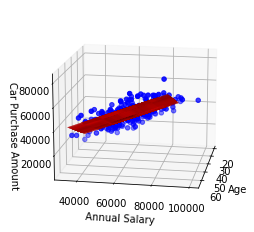

In [5]:
# Graph the data and the hiperplane
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Scatter plot the data
ax.scatter(x_train[:,0], x_train[:,1], y_train, c='b', marker='o')

# Surface of the hiperplane
xx1, xx2 = np.meshgrid(x_train[:,0], x_train[:,1])
# Equation of the hiperplane
yy = model.intercept_ + model.coef_[0][0]*xx1 + model.coef_[0][1]*xx2

# Plot the surface
ax.plot_surface(xx1, xx2, yy, color='r', alpha=0.2)

# Set the labels
ax.set_xlabel('Age')
ax.set_ylabel('Annual Salary')
ax.set_zlabel('Car Purchase Amount')
ax.azim = 10
ax.elev = 15

Mostramos los coeficientes de la regresión.

In [6]:
#Coeficients of the regression (intercept and the coeficients of the variables)
print('Intercept:', model.intercept_)
print('Coeficients:', model.coef_)

Intercept: [-30730.0819438]
Coeficients: [[8.35931873e+02 5.84070121e-01]]


**Prueba del modelo.**

Realizamos las predicciones de nuestro modelo.

MSE test:  25229578.155776158
Predicciones [:5]:  [46387.13071969 47113.12377686 37934.1786899  57823.90857627
 35737.15224102]
Valores reales [:5]:  [38955.21919 43401.56612 29417.64694 52150.41786 38243.06228]


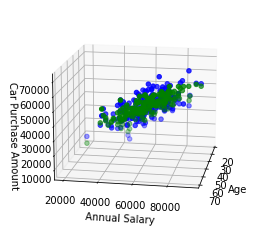

In [7]:
predicciones = model.predict(x_test)
mse_test = np.mean((predicciones - y_test) ** 2)
print('MSE test: ', mse_test)
print('Predicciones [:5]: ', predicciones.flatten()[:5])
print('Valores reales [:5]: ', y_test.flatten()[:5])

# Plot the data
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x_test[:,0], x_test[:,1], y_test, c='b', marker='o')
ax.scatter(x_test[:,0], x_test[:,1], predicciones, c='g', marker='o')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Salary')
ax.set_zlabel('Car Purchase Amount')
ax.azim = 10
ax.elev = 15
plt.show()